### Excercise 1 Code

Convariance Matrices are Legal? : True


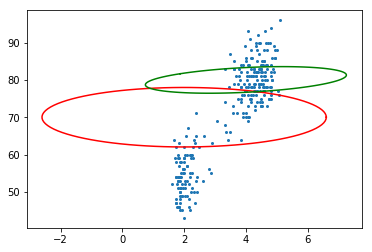

In [1]:
import csv, copy, gzip, pickle

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import chi2

%matplotlib inline

# TODO: find better data
with open('data/faithful.txt', 'rt') as csvfile:
    dataReader = csv.reader(csvfile, delimiter=' ')
    # initialize an empty array
    data = []
    for row in dataReader:
        data.append(np.array(row).astype(np.float))
    # convert data into a numpy array
    data = np.asarray(data)
    
ngmm = 2 # quantity of Gaussian Mixture Model
mu = np.asarray([[2, 70], 
                 [4, 80]]
               ).astype('float')

sigma = np.asarray([[[1, 0], 
                     [0, 3]], 
                    [[0.5, 0.2], 
                     [0.2, 0.6]]]
                  ).astype('float')
def covmatIsLegal(sigma):
    for covmat in sigma:
        if not(np.allclose(covmat, covmat.T)) or np.any(np.linalg.eigvals(covmat) <= 0):
            return False
    return True

print("Convariance Matrices are Legal? : %r" % covmatIsLegal(sigma))
gmm = [{'mean': mu[m], 'covariance': sigma[m], 'prior': 1.0/ngmm} for m in range(ngmm)]

def plotGaussianModel2D(mu, sigma, pltopt='k'):
    if sigma.any():
        # calculate ellipse constants
        c = chi2.ppf(0.9, 2) # use confidence interval 0.9
        # get eigen vector and eigen values
        eigenValue, eigenVector = np.linalg.eig(sigma)
        # calculate points on ellipse
        t = np.linspace(0, 2*np.pi, 100) # draw 100 points
        u = [np.cos(t), np.sin(t)]
        w = c * eigenVector.dot(np.diag(np.sqrt(eigenValue)).dot(u))
        z = w.T + mu
    else:
        z = mu
    # plot ellipse by connecting sample points on curve
    plt.plot(z[:,0], z[:,1], pltopt)
    
def colorPicker(index):
    colors = 'rgbcmyk'
    return colors[np.remainder(index, len(colors))]

def gmmplot(data, gmm):
    # plot data points
    plt.scatter(data[:, 0], data[:, 1], s=4)
    # plot Gaussian model
    color = 'rgb'
    for index, model in enumerate(gmm):
        plotGaussianModel2D(model['mean'], model['covariance'], colorPicker(index))

gmmplot(data, gmm)
gmm = [{'mean': mu[m], 'covariance': sigma[m], 'prior': 1.0/ngmm} for m in range(ngmm)]


### Optimizing Covariance and Priors

unnormalized prior:  161.9322918377564
unnormalized prior:  110.06770816224373
unnormalized prior:  162.33059233603007
unnormalized prior:  109.6694076639699
unnormalized prior:  204.9747671416559
unnormalized prior:  67.02523285834411
unnormalized prior:  271.99999999932334
unnormalized prior:  6.766685859044026e-10

xn: [ 3.6 79. ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 1.8 54. ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 3.333 74.   ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 2.283 62.   ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 4.533 85.   ]
mean: [5.15434462e+09 1.04773681

/home/jonsnow/Repositories/bmcfarland491/gmmlib.py:35: RuntimeWarning: invalid value encountered in double_scalars
  posteriors[n] = [i/normalizing_constant for i in posteriors[n]]



mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 4.433 79.   ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 4.3 73. ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 4.467 77.   ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 3.367 66.   ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 4.033 80.   ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 3.833 74.   ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.

covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 4.583 77.   ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 3.333 68.   ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 4.167 81.   ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 4.333 81.   ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 4.5 73. ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.98085905e+29 1.62228963e+31]]
prior: 0.9999999999975122

xn: [ 2.417 50.   ]
mean: [5.15434462e+09 1.04773681e+11]
covar: [[3.92618618e+28 7.98085905e+29]
 [7.980859

LinAlgError: Array must not contain infs or NaNs

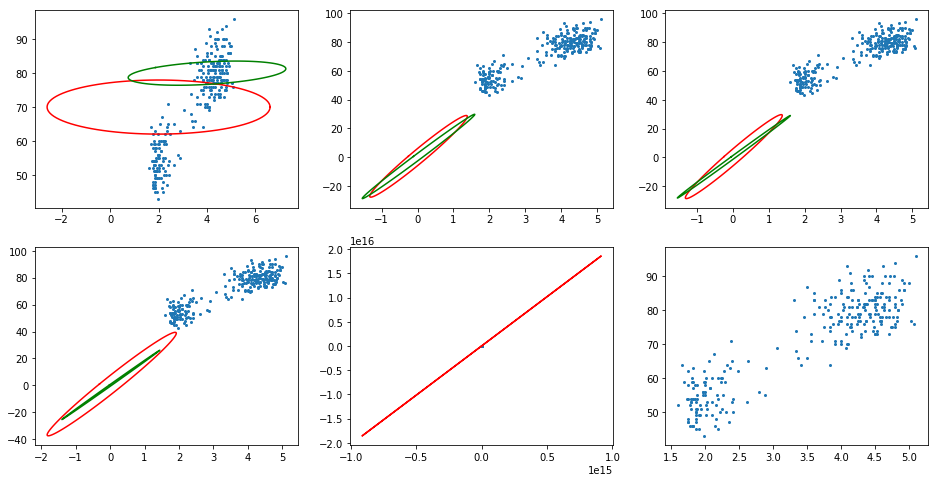

In [2]:
from gmmlib import expectation, maximization, maximization_mean

# make a true copy of our model
gmmcp = copy.deepcopy(gmm)

# create figure
plt.figure(figsize=(16, 8))
# improve model with EM-Algorithm
for i in range(5):
    # plot current status
    plt.subplot(231 + i)
    gmmplot(data, gmmcp)
    # excute EM-Algorithm
    for j in range(1):
        posterior = expectation(data, gmmcp)
        gmmcp = maximization(posterior, data, gmmcp)
# plot final status
plt.subplot(236)
gmmplot(data,gmmcp)